In [404]:
## This note book is write by Qihan Jiang
## This note book is used to find how liveable and affortable each suburb is 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [405]:
## Read in the final domain csv
df = pd.read_csv("../data/curated/domain_final.csv")

In [406]:
df.head()

,Unnamed: 0,uri,name,cost_text,type,school_title,school_distance,suburb_sold,suburb_avg_day,suburb_population,...,dist_nearest_secondary_school,Beds,Bath,Parking,SA2_CODE21,avg_income,Median_tot_fam_inc_weekly,Tot_P_P,Median_age_persons,Median_rent_weekly
0,0,https://www.domain.com.au/1202-620-collins-str...,1202/620 Collins Street Melbourne VIC 3000,$500 per week,Apartment / Unit / Flat,University High School,2.4,596.0,147.0,47279.0,...,380.6,2.0,1.0,1,206041503,2035.430097,2248.0,9848.0,30.0,375.0
1,2,https://www.domain.com.au/5707b-639-little-lon...,5707B/639 Little Lonsdale Street Melbourne VIC...,$570,Apartment / Unit / Flat,University High School,1.9,387.0,120.0,47279.0,...,355.7,1.0,1.0,0,206041503,2035.430097,2248.0,9848.0,30.0,375.0
2,4,https://www.domain.com.au/1202-31-spring-stree...,1202/31 Spring Street Melbourne VIC 3000,$570.00,Apartment / Unit / Flat,Carlton Gardens Primary School,1.4,596.0,147.0,47279.0,...,703.0,2.0,1.0,1,206041503,2035.430097,2248.0,9848.0,30.0,375.0
3,5,https://www.domain.com.au/623-539-st-kilda-roa...,623/539 St Kilda Road Melbourne VIC 3000,$475 per week,Apartment / Unit / Flat,South Yarra Primary School,0.7,387.0,120.0,47279.0,...,584.0,1.0,1.0,1,206041503,2035.430097,2248.0,9848.0,30.0,375.0
4,6,https://www.domain.com.au/315-118-russell-stre...,315/118 Russell Street Melbourne VIC 3000,$550 per week,Apartment / Unit / Flat,Carlton Gardens Primary School,1.3,387.0,120.0,47279.0,...,497.6,1.0,1.0,0,206041503,2035.430097,2248.0,9848.0,30.0,375.0


In [407]:
## To calculated affortable, we will use the formular (average cost in suburb)/(average income in suburb)
## 
affortable_df = pd.DataFrame(df,columns=["postcode","cost","avg_income"])

In [408]:
affortable_df["cost_gap"]=affortable_df["cost"]/affortable_df["avg_income"]

In [409]:
affortable_df.head()


,postcode,cost,avg_income,cost_gap
0,3000,500.0,2035.430097,0.245648
1,3000,570.0,2035.430097,0.280039
2,3000,570.0,2035.430097,0.280039
3,3000,475.0,2035.430097,0.233366
4,3000,550.0,2035.430097,0.270213


In [410]:
affortable_df.shape

(10158, 4)

In [411]:
affortable_df.isnull().sum()

postcode        0
cost            0
avg_income    141
cost_gap      141
dtype: int64

In [412]:
affortable_df.dropna(subset=['avg_income'], inplace=True)

In [413]:
cost_gap_output= affortable_df.groupby("postcode").agg({'cost_gap':'mean'})


In [414]:
cost_gap_output.head()

,cost_gap
postcode,
3000,0.226212
3002,0.146635
3004,0.159437
3008,0.197724
3011,0.180597


In [415]:
print(cost_gap_output.sort_values(by=["cost_gap"],ascending=True)[:10])

          cost_gap
postcode          
3125      0.109821
3085      0.120141
3737      0.126544
3289      0.128827
3331      0.133735
3134      0.134924
3144      0.135774
3145      0.138427
3122      0.138503
3127      0.139452


In [416]:
print(cost_gap_output.sort_values(by=["cost_gap"],ascending=False)[:10])

          cost_gap
postcode          
3858      0.550120
3904      0.394804
3965      0.342909
3213      0.309285
3631      0.303043
3984      0.292961
3324      0.292790
3918      0.292274
3779      0.290680
3862      0.288469


In [417]:
cost_output= affortable_df.groupby("postcode").agg({'cost':'mean'})

In [418]:
df_2 = pd.read_csv("../data/curated/MainHospitalList (1).csv")

In [419]:
df_2.head()

,Hospital ID,Formal Name,Other Name,Emergency Capable,Location Address,Suburb,Postcode,Access Point,Category,Agency Type
0,5488,Albert Road Clinic,Albert Road Clinic,NO,31-33 Albert Road,South Melbourne,3205,NaN,PRIVATE,Private Hospital
1,3485,Albury Wodonga Health,Albury Wodonga Health,YES,69 Vermont Street,Wodonga,3690,NaN,PUBLIC,Public Hospital
2,12990,"Albury Wodonga Health, Albury Campus","Albury Wodonga Health, Albury Campus",YES,Borella,Albury,2640,NaN,PUBLIC,Public Hospital
3,3491,Alexandra District Health,Alexandra District Health,NO,20 Cooper Street,Alexandra,3714,NaN,PUBLIC,Public Hospital
4,11519,Alfred Health,Alfred Health,NO,Commercial Road,Melbourne,3004,NaN,PUBLIC,Public Hospital


In [420]:
hospital_count = df_2.loc[:,"Postcode"].value_counts().rename_axis('postcode').reset_index(name='hos_count')

In [421]:
hospital_count.head()

,postcode,hos_count
0,3199,8
1,3002,7
2,3168,6
3,3011,6
4,3101,6


In [422]:
df_3 = pd.read_csv("../data/curated/dv309_schoollocations2021.csv", encoding='cp1252')

In [423]:
df_3.head()

,Education_Sector,Entity_Type,SCHOOL_NO,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,NaN,Avoca,VIC,...,P O Box 12,NaN,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,NaN,Avenel,VIC,...,40 Anderson Street,NaN,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,NaN,Warrandyte,VIC,...,5-11 Forbes Street,NaN,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),145.213980,-37.742675


In [424]:
school_count = df_3.loc[:,"Postal_Postcode"].value_counts().rename_axis('postcode').reset_index(name='school_count')

In [425]:
school_count.head()

,postcode,school_count
0,3030,33
1,3350,25
2,3977,23
3,3029,21
4,3150,21


In [426]:
bus_df = pd.DataFrame(df,columns=["postcode","dist_nearest_busstop"])
train_df=pd.DataFrame(df,columns=["postcode","dist_nearest_trainstation"])

In [427]:
bus_df.isnull().sum()

postcode                0
dist_nearest_busstop    0
dtype: int64

In [428]:
train_df.isnull().sum()

postcode                     0
dist_nearest_trainstation    0
dtype: int64

In [429]:
bus_output= bus_df.groupby("postcode").agg({'dist_nearest_busstop':'mean'}).reset_index()
train_output = train_df.groupby("postcode").agg({'dist_nearest_trainstation':'mean'}).reset_index()

In [430]:
bus_output.head()

,postcode,dist_nearest_busstop
0,3000,339.496471
1,3002,445.300000
2,3003,173.639474
3,3004,634.430000
4,3006,458.680208


In [431]:
train_output.head()

,postcode,dist_nearest_trainstation
0,3000,727.642353
1,3002,819.889474
2,3003,705.686842
3,3004,1505.120000
4,3006,1521.578125


In [432]:
train_output.sort_values(by=["dist_nearest_trainstation"],ascending=True)[:10]
bus_output.sort_values(by=["dist_nearest_busstop"],ascending=True)[:10]


,postcode,dist_nearest_busstop
219,3450,14.500000
186,3289,101.200000
69,3085,126.563158
152,3193,134.866667
150,3191,143.892308
27,3036,157.200000
156,3197,158.000000
222,3465,161.460000
63,3078,161.733333
139,3180,163.500000


<function matplotlib.pyplot.show(close=None, block=None)>

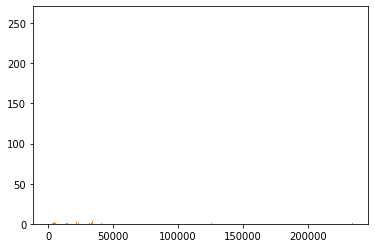

In [433]:
plt.hist(bus_output,bins = bus_output.shape[0])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

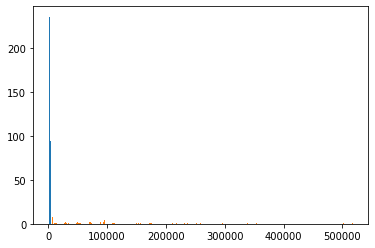

In [434]:
plt.hist(train_output,bins = train_output.shape[0])
plt.show

In [435]:
train_df_clean=train_df.drop(train_df[train_df["dist_nearest_trainstation"]>5000].index)
bus_df_clean=bus_df.drop(bus_df[bus_df["dist_nearest_busstop"]>2000].index)

<function matplotlib.pyplot.show(close=None, block=None)>

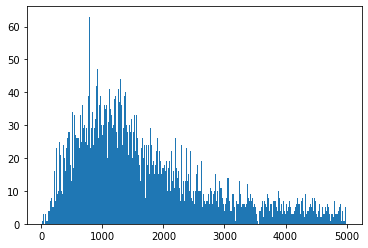

In [436]:
plt.hist(train_df_clean["dist_nearest_trainstation"],bins = 500)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

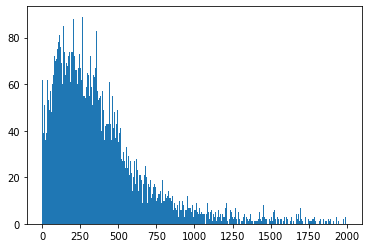

In [437]:
plt.hist(bus_df_clean["dist_nearest_busstop"],bins = 500)
plt.show

Bus: 0-200,200-500,500-800,800-1250,1250-end
Train:0-500,500-1000,1000-2000,2000-3000,3000-end


In [438]:
rank_df=pd.DataFrame(df['postcode'].unique(), columns= ['postcode'] )
rank_df

,postcode
0,3000
1,3002
2,3003
3,3004
4,3006
...,...
325,3980
326,3981
327,3984
328,3995


In [439]:
rank_df=rank_df.join(train_output.set_index("postcode"),on="postcode")
rank_df=rank_df.join(bus_output.set_index("postcode"),on="postcode")
rank_df=rank_df.join(school_count.set_index("postcode"),on="postcode")
rank_df=rank_df.join(hospital_count.set_index("postcode"),on="postcode")

In [440]:
rank_df['school_count'].fillna(0, inplace=True)
rank_df['hos_count'].fillna(0, inplace=True)

In [441]:
rank_df.head()

,postcode,dist_nearest_trainstation,dist_nearest_busstop,school_count,hos_count
0,3000,727.642353,339.496471,4.0,4.0
1,3002,819.889474,445.300000,0.0,7.0
2,3003,705.686842,173.639474,1.0,0.0
3,3004,1505.120000,634.430000,4.0,2.0
4,3006,1521.578125,458.680208,2.0,0.0


In [442]:
rank_df.shape

(330, 5)

In [443]:
x = rank_df[['dist_nearest_trainstation', 'dist_nearest_busstop','school_count','hos_count']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
rank_final1 = pd.DataFrame(x_scaled, columns= ['dist_nearest_trainstation', 'dist_nearest_busstop','school_count','hos_count'] )

In [444]:
rank_df['dist_nearest_trainstation'] = rank_final1['dist_nearest_trainstation']
rank_df['dist_nearest_busstop'] = rank_final1['dist_nearest_busstop']
rank_df['school_count'] = rank_final1['school_count']
rank_df['hos_count'] = rank_final1['hos_count']

In [445]:
rank_df["dist_nearest_trainstation"]=rank_df["dist_nearest_trainstation"]*-1
rank_df["dist_nearest_busstop"]=rank_df["dist_nearest_busstop"]*-1

In [446]:
rank_df.head()

,postcode,dist_nearest_trainstation,dist_nearest_busstop,school_count,hos_count
0,3000,-0.000526,-0.001385,0.121212,0.500
1,3002,-0.000704,-0.001836,0.000000,0.875
2,3003,-0.000483,-0.000678,0.030303,0.000
3,3004,-0.002028,-0.002641,0.121212,0.250
4,3006,-0.002060,-0.001893,0.060606,0.000


In [463]:
rank_df['rank'] =  100*rank_df.dist_nearest_trainstation + 100*rank_df.dist_nearest_busstop + 0.5*rank_df.school_count + 0.5*rank_df.hos_count

In [464]:
rank_df.head()

,postcode,dist_nearest_trainstation,dist_nearest_busstop,school_count,hos_count,rank
0,3000,-0.000526,-0.001385,0.121212,0.500,0.119570
1,3002,-0.000704,-0.001836,0.000000,0.875,0.183550
2,3003,-0.000483,-0.000678,0.030303,0.000,-0.100970
3,3004,-0.002028,-0.002641,0.121212,0.250,-0.281388
4,3006,-0.002060,-0.001893,0.060606,0.000,-0.364987


In [465]:
top_10 = rank_df.sort_values('rank',ascending=False).head(11)
top_10

,postcode,dist_nearest_trainstation,dist_nearest_busstop,school_count,hos_count,rank
158,3199,-0.002204,-0.001206,0.575758,1.000,0.446894
6,3011,-0.001103,-0.000761,0.121212,0.750,0.249173
1,3002,-0.000704,-0.001836,0.000000,0.875,0.183550
145,3186,-0.000570,-0.000735,0.242424,0.375,0.178226
68,3084,-0.001178,-0.001155,0.303030,0.500,0.168236
0,3000,-0.000526,-0.001385,0.121212,0.500,0.119570
14,3021,-0.002152,-0.001276,0.545455,0.375,0.117467
47,3058,-0.001236,-0.000914,0.363636,0.250,0.091759
161,3204,-0.000310,-0.000970,0.272727,0.125,0.070798
148,3189,-0.000668,-0.000652,0.272727,0.125,0.066769
